In [1]:
import pandas as pd

# series
series = pd.Series(["BMW", "Toyota", "Honda"])
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [2]:
# series have 1 dimension
colors = pd.Series(["Blue", "Red", "Green"])
colors

0     Blue
1      Red
2    Green
dtype: object

In [3]:
# Dataframe has 2 dimensions
car_data = pd.DataFrame({
    "Car Maker": series,
    "Colors": colors
})
car_data

,Car Maker,Colors
0,BMW,Blue
1,Toyota,Red
2,Honda,Green


In [4]:
# importing data
car_sales = pd.read_csv("../Data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [5]:
# exporting a data frame
car_data.to_csv("exported.csv")

# Describing data 

In [6]:
# listing the data frame data types
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [7]:
# listing columns
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [8]:
# listing the indexes
car_index = car_sales.index
car_index

RangeIndex(start=0, stop=10, step=1)

In [9]:
# having some statistical informations about the data frame
# describe works only on numerical values
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [10]:
# general summary
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [11]:
# the average of numerical columns
car_sales.mean()

C:\Users\tchio\AppData\Local\Temp/ipykernel_972/2669820985.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_sales.mean()


Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [12]:
# for summing up different values of each columns
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [13]:
# On a single column
car_sales["Doors"].sum()

40

In [14]:
# retrieving the number of records in a data frame
len(car_sales)

10

## Viewing and selecting data

In [15]:
# retrieving the top 5 rows of the data frame
# for the top 7 use head(7)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [16]:
# retrieving the 5 last rows
# for the n last rows use tail(n)
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [17]:
# .loc and .iloc
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"],
                    index=[0, 3, 9, 8, 3])

In [18]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

# iloc and loc

In [19]:
# loc returns the data with the given row index
animals.loc[3]

3      dog
3    snake
dtype: object

In [20]:
# iloc returns the data at the given index
animals.iloc[3]

'panda'

In [21]:
# selecting one column
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [22]:
# or do
# it doesn't work if the columun's name has a space
car_sales.Make


0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [23]:
# selecting rows based on a condtition
# EX: cars made by Toyota
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


## Viewing and selecting data (continued)

In [24]:
# aggregating and comparing data through 2 columns
pd.crosstab(car_sales.Make, car_sales.Doors)

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [25]:
# for more columns use groupby
# groupby is always combined with an operation like mean()
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

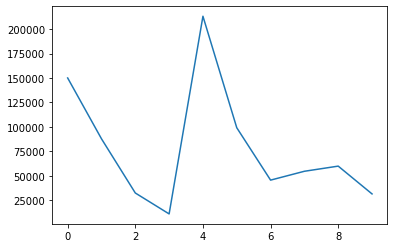

In [26]:
# plotting on the values of a column
car_sales["Odometer (KM)"].plot()

<AxesSubplot:>

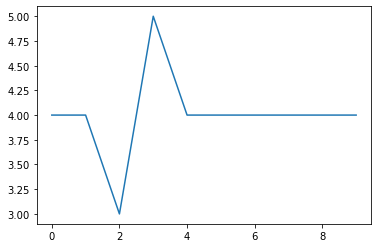

In [27]:
car_sales.Doors.plot()

In [28]:
car_sales[car_sales["Odometer (KM)"] >= 175000]

,Make,Colour,Odometer (KM),Doors,Price
4,Nissan,White,213095,4,"$3,500.00"


<AxesSubplot:>

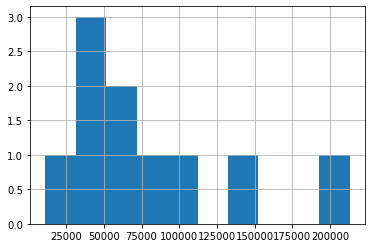

In [29]:
# for visualizing a histogram use the use hist function
car_sales["Odometer (KM)"].hist()

In [30]:
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [31]:
#converting the price column values to integers
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)
car_sales

C:\Users\tchio\AppData\Local\Temp/ipykernel_972/3891652310.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [32]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


<AxesSubplot:>

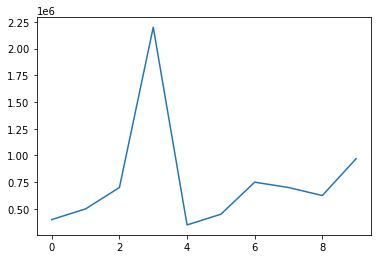

In [33]:
car_sales.Price.plot()

## Manipulating data

In [34]:
# lowercasing values of a column
car_sales.Make.str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [35]:
# changing values of a  DataFrame's column
car_sales.Make = car_sales.Make.str.lower()

In [36]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,400000
1,honda,Red,87899,4,500000
2,toyota,Blue,32549,3,700000
3,bmw,Black,11179,5,2200000
4,nissan,White,213095,4,350000
5,toyota,Green,99213,4,450000
6,honda,Blue,45698,4,750000
7,honda,Blue,54738,4,700000
8,toyota,White,60000,4,625000
9,nissan,White,31600,4,970000


## Dealing with uncomplete data source

In [37]:
missing_car_sales = pd.read_csv("../Data/car-sales-missing-data.csv")

In [38]:
# filling in missing values
missing_car_sales["Odometer"].fillna(missing_car_sales["Odometer"].mean())

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [39]:
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [40]:
# setting the inplace parameter to True operates the changes right away
missing_car_sales["Odometer"].fillna(missing_car_sales["Odometer"].mean(),
                                     inplace=True)

In [41]:
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [42]:
# to drop NaN rows use the dropna() function
missing_car_sales.dropna(inplace=True)

In [43]:
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [44]:
# dropped values can't be got back, we must re-import the csv file
missing_car_sales = pd.read_csv("../Data/car-sales-missing-data.csv")
missing_car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [45]:
missing_car_sales["Test"] = missing_car_sales.Price[:].str.slice(start=1)
missing_car_sales

,Make,Colour,Odometer,Doors,Price,Test
0,Toyota,White,150043.0,4.0,"$4,000","4,000"
1,Honda,Red,87899.0,4.0,"$5,000","5,000"
2,Toyota,Blue,NaN,3.0,"$7,000","7,000"
3,BMW,Black,11179.0,5.0,"$22,000","22,000"
4,Nissan,White,213095.0,4.0,"$3,500","3,500"
5,Toyota,Green,NaN,4.0,"$4,500","4,500"
6,Honda,NaN,NaN,4.0,"$7,500","7,500"
7,Honda,Blue,NaN,4.0,NaN,NaN
8,Toyota,White,60000.0,NaN,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700","9,700"


In [46]:
missing_car_sales.describe()

,Odometer,Doors
count,6.000000,9.0
mean,92302.666667,4.0
std,76489.805168,0.5
min,11179.000000,3.0
25%,38700.000000,4.0
50%,73949.500000,4.0
75%,134507.000000,4.0
max,213095.000000,5.0


In [47]:
missing_car_sales["Test"].fillna(0, inplace=True)

In [48]:
missing_car_sales

,Make,Colour,Odometer,Doors,Price,Test
0,Toyota,White,150043.0,4.0,"$4,000","4,000"
1,Honda,Red,87899.0,4.0,"$5,000","5,000"
2,Toyota,Blue,NaN,3.0,"$7,000","7,000"
3,BMW,Black,11179.0,5.0,"$22,000","22,000"
4,Nissan,White,213095.0,4.0,"$3,500","3,500"
5,Toyota,Green,NaN,4.0,"$4,500","4,500"
6,Honda,NaN,NaN,4.0,"$7,500","7,500"
7,Honda,Blue,NaN,4.0,NaN,0
8,Toyota,White,60000.0,NaN,NaN,0
9,NaN,White,31600.0,4.0,"$9,700","9,700"


In [49]:
missing_car_sales["Test"].dtype

dtype('O')

In [50]:
missing_car_sales["Test"] = missing_car_sales["Test"].str.replace('[\,]', '').astype(float)


C:\Users\tchio\AppData\Local\Temp/ipykernel_972/1474474428.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  missing_car_sales["Test"] = missing_car_sales["Test"].str.replace('[\,]','').astype(float)


In [51]:
missing_car_sales.Test

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7        NaN
8        NaN
9     9700.0
Name: Test, dtype: float64

In [52]:
missing_car_sales["Test"].fillna(0, inplace=True)

<AxesSubplot:title={'center':'Plotting the test prices'}, ylabel='Density'>

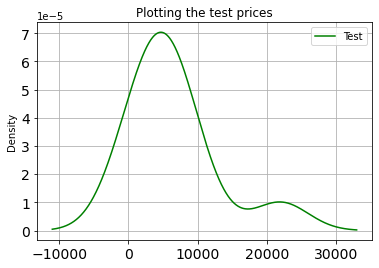

In [53]:
missing_car_sales["Test"].plot(title="Plotting the test prices", kind="kde",
                               legend=True, xlabel="Index", ylabel="Prix",
                               color="green", fontsize=14, grid=True)

<AxesSubplot:title={'center':'The whole entreprise data'}, xlabel='Car makers', ylabel='Number of doors'>

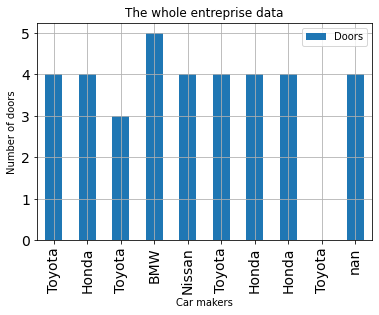

In [54]:
missing_car_sales.plot(kind="bar", title="The whole entreprise data",
                       fontsize=14, x="Make", y="Doors", grid=True,
                       xlabel="Car makers", ylabel="Number of doors")

<AxesSubplot:xlabel='Odometer', ylabel='Test'>

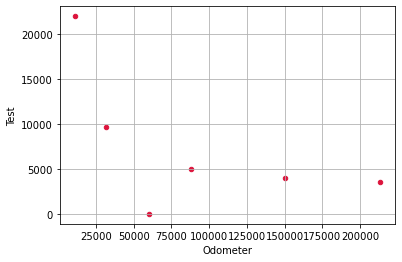

In [55]:
missing_car_sales.plot.scatter(x='Odometer', y='Test', color="crimson", fontsize=10, grid=True)

In [56]:
# adding a column from a Serie
seats_column = pd.Series([5, 5, 5, 5, 5])
car_sales = pd.read_csv("../Data/car-sales.csv")
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,"$4,000.00",5.0
1,Honda,Red,87899,4,"$5,000.00",5.0
2,Toyota,Blue,32549,3,"$7,000.00",5.0
3,BMW,Black,11179,5,"$22,000.00",5.0
4,Nissan,White,213095,4,"$3,500.00",5.0
5,Toyota,Green,99213,4,"$4,500.00",NaN
6,Honda,Blue,45698,4,"$7,500.00",NaN
7,Honda,Blue,54738,4,"$7,000.00",NaN
8,Toyota,White,60000,4,"$6,250.00",NaN
9,Nissan,White,31600,4,"$9,700.00",NaN


In [57]:
car_sales["Price"] = car_sales["Price"][:].str.slice(start=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,"4,000.00",5.0
1,Honda,Red,87899,4,"5,000.00",5.0
2,Toyota,Blue,32549,3,"7,000.00",5.0
3,BMW,Black,11179,5,"22,000.00",5.0
4,Nissan,White,213095,4,"3,500.00",5.0
5,Toyota,Green,99213,4,"4,500.00",NaN
6,Honda,Blue,45698,4,"7,500.00",NaN
7,Honda,Blue,54738,4,"7,000.00",NaN
8,Toyota,White,60000,4,"6,250.00",NaN
9,Nissan,White,31600,4,"9,700.00",NaN


In [58]:
car_sales["Price"].dtypes

dtype('O')

In [59]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,"4,000.00",5.0
1,Honda,Red,87899,4,"5,000.00",5.0
2,Toyota,Blue,32549,3,"7,000.00",5.0
3,BMW,Black,11179,5,"22,000.00",5.0
4,Nissan,White,213095,4,"3,500.00",5.0
5,Toyota,Green,99213,4,"4,500.00",NaN
6,Honda,Blue,45698,4,"7,500.00",NaN
7,Honda,Blue,54738,4,"7,000.00",NaN
8,Toyota,White,60000,4,"6,250.00",NaN
9,Nissan,White,31600,4,"9,700.00",NaN


In [60]:
car_sales["Seats"].fillna(5, inplace=True)

In [61]:
# column from a list
#the list must have the same length as the DataFrame length, otherwise => error !
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3, 4.5]
car_sales["Fuel per 100KM"] = fuel_economy

In [62]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,Toyota,White,150043,4,"4,000.00",5.0,7.5
1,Honda,Red,87899,4,"5,000.00",5.0,9.2
2,Toyota,Blue,32549,3,"7,000.00",5.0,5.0
3,BMW,Black,11179,5,"22,000.00",5.0,9.6
4,Nissan,White,213095,4,"3,500.00",5.0,8.7
5,Toyota,Green,99213,4,"4,500.00",5.0,4.7
6,Honda,Blue,45698,4,"7,500.00",5.0,7.6
7,Honda,Blue,54738,4,"7,000.00",5.0,8.7
8,Toyota,White,60000,4,"6,250.00",5.0,3.0
9,Nissan,White,31600,4,"9,700.00",5.0,4.5


In [63]:
# total fuel used by a car
car_sales["Total fuel used (L)"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel per 100KM"]

In [64]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,Toyota,White,150043,4,"4,000.00",5.0,7.5,11253.225
1,Honda,Red,87899,4,"5,000.00",5.0,9.2,8086.708
2,Toyota,Blue,32549,3,"7,000.00",5.0,5.0,1627.450
3,BMW,Black,11179,5,"22,000.00",5.0,9.6,1073.184
4,Nissan,White,213095,4,"3,500.00",5.0,8.7,18539.265
5,Toyota,Green,99213,4,"4,500.00",5.0,4.7,4663.011
6,Honda,Blue,45698,4,"7,500.00",5.0,7.6,3473.048
7,Honda,Blue,54738,4,"7,000.00",5.0,8.7,4762.206
8,Toyota,White,60000,4,"6,250.00",5.0,3.0,1800.000
9,Nissan,White,31600,4,"9,700.00",5.0,4.5,1422.000


In [65]:
# create a column from a single value
car_sales["Number of wheels"] = 4

In [66]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels
0,Toyota,White,150043,4,"4,000.00",5.0,7.5,11253.225,4
1,Honda,Red,87899,4,"5,000.00",5.0,9.2,8086.708,4
2,Toyota,Blue,32549,3,"7,000.00",5.0,5.0,1627.450,4
3,BMW,Black,11179,5,"22,000.00",5.0,9.6,1073.184,4
4,Nissan,White,213095,4,"3,500.00",5.0,8.7,18539.265,4
5,Toyota,Green,99213,4,"4,500.00",5.0,4.7,4663.011,4
6,Honda,Blue,45698,4,"7,500.00",5.0,7.6,3473.048,4
7,Honda,Blue,54738,4,"7,000.00",5.0,8.7,4762.206,4
8,Toyota,White,60000,4,"6,250.00",5.0,3.0,1800.000,4
9,Nissan,White,31600,4,"9,700.00",5.0,4.5,1422.000,4


In [67]:
car_sales["Passed route safety"] = True

In [68]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed route safety
0,Toyota,White,150043,4,"4,000.00",5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,"5,000.00",5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,"7,000.00",5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,"22,000.00",5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,"3,500.00",5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,"4,500.00",5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,"7,500.00",5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,"7,000.00",5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,"6,250.00",5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,"9,700.00",5.0,4.5,1422.000,4,True


In [69]:
car_sales.describe()

,Odometer (KM),Doors,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels
count,10.000000,10.000000,10.0,10.000000,10.000000,10.0
mean,78601.400000,4.000000,5.0,6.850000,5670.009700,4.0
std,61983.471735,0.471405,0.0,2.340584,5575.650508,0.0
min,11179.000000,3.000000,5.0,3.000000,1073.184000,4.0
25%,35836.250000,4.000000,5.0,4.775000,1670.587500,4.0
50%,57369.000000,4.000000,5.0,7.550000,4068.029500,4.0
75%,96384.500000,4.000000,5.0,8.700000,7255.582500,4.0
max,213095.000000,5.000000,5.0,9.600000,18539.265000,4.0


In [70]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 10 non-null     object 
 1   Colour               10 non-null     object 
 2   Odometer (KM)        10 non-null     int64  
 3   Doors                10 non-null     int64  
 4   Price                10 non-null     object 
 5   Seats                10 non-null     float64
 6   Fuel per 100KM       10 non-null     float64
 7   Total fuel used (L)  10 non-null     float64
 8   Number of wheels     10 non-null     int64  
 9   Passed route safety  10 non-null     bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 858.0+ bytes


In [71]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed route safety
0,Toyota,White,150043,4,"4,000.00",5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,"5,000.00",5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,"7,000.00",5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,"22,000.00",5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,"3,500.00",5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,"4,500.00",5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,"7,500.00",5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,"7,000.00",5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,"6,250.00",5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,"9,700.00",5.0,4.5,1422.000,4,True


In [72]:
car_sales["Price"] = car_sales["Price"].str.replace('[\,]', '').astype(float)

C:\Users\tchio\AppData\Local\Temp/ipykernel_972/3671943592.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\,]','').astype(float)


In [73]:
car_sales.Price.dtypes

dtype('float64')

In [74]:
# dropping a column
# columns are on axis = 1, that's why we must precise it
# as for rows, they're on axis = 0
car_sales.drop("Number of wheels", axis=1, inplace=True)

In [75]:
# shuffling the dataframe's rows with sample method
# frac represents the percentage of data to retrieve (EX: frac = 0.5 => 50%)
shuffled_car_sales = car_sales.sample(frac=1)

In [76]:
# reorganizing indexes and dropping shuffled index with reset_index
shuffled_car_sales.reset_index(drop=True, inplace=True)

In [77]:
shuffled_car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Passed route safety
0,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,True
1,Toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,True
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,True
3,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,True
4,Honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,True
5,Nissan,White,31600,4,9700.0,5.0,4.5,1422.000,True
6,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,True
7,Honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,True
8,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,True
9,Toyota,White,60000,4,6250.0,5.0,3.0,1800.000,True


In [78]:
# applying a function on a column with the "apply()" method
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)

In [79]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Passed route safety
0,Toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,True
1,Honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,True
2,Toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,True
3,BMW,Black,6986.875,5,22000.0,5.0,9.6,1073.184,True
4,Nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,True
5,Toyota,Green,62008.125,4,4500.0,5.0,4.7,4663.011,True
6,Honda,Blue,28561.250,4,7500.0,5.0,7.6,3473.048,True
7,Honda,Blue,34211.250,4,7000.0,5.0,8.7,4762.206,True
8,Toyota,White,37500.000,4,6250.0,5.0,3.0,1800.000,True
9,Nissan,White,19750.000,4,9700.0,5.0,4.5,1422.000,True
